In [6]:
!pip install pymongo

     |████████████████████████████████| 506 kB 31.8 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [7]:
!pip install pymongo[srv]

     |████████████████████████████████| 241 kB 25.5 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [8]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [9]:
!pip install tweepy

     |████████████████████████████████| 65 kB 5.5 MB/s  eta 0:00:01
     |███████████████████████████████▍| 143 kB 69.6 MB/s eta 0:00:01     |████████████████████████████████| 146 kB 69.6 MB/s 
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [11]:
!pip install twitter

     |████████████████████████████████| 50 kB 8.8 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [12]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

In [13]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

In [19]:
client = MongoClient(mongod_connect)
db = client.lab11 # use or create a database named demo
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

authorize rush api

In [22]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

In [23]:
count = 100 #number of returned tweets, default and max is 100
geocode = "37.5247764,-77.5633011,150mi"  # defin the location, in Harrisonburg, VA
q = "covid19" 

In [24]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Wed Nov 17 21:05:10 +0000 2021'
'Wed Nov 17 21:05:01 +0000 2021'
'Wed Nov 17 21:01:23 +0000 2021'
'Wed Nov 17 21:00:46 +0000 2021'
'Wed Nov 17 21:00:30 +0000 2021'
'Wed Nov 17 21:00:21 +0000 2021'
'Wed Nov 17 21:00:11 +0000 2021'
'Wed Nov 17 21:00:01 +0000 2021'
'Wed Nov 17 21:00:00 +0000 2021'
'Wed Nov 17 20:57:00 +0000 2021'
'Wed Nov 17 20:52:02 +0000 2021'
'Wed Nov 17 20:51:22 +0000 2021'
'Wed Nov 17 20:51:21 +0000 2021'
'Wed Nov 17 20:50:18 +0000 2021'
'Wed Nov 17 20:48:35 +0000 2021'
'Wed Nov 17 20:48:03 +0000 2021'
'Wed Nov 17 20:46:21 +0000 2021'
'Wed Nov 17 20:46:11 +0000 2021'
'Wed Nov 17 20:45:45 +0000 2021'
'Wed Nov 17 20:45:03 +0000 2021'
'Wed Nov 17 20:45:03 +0000 2021'
'Wed Nov 17 20:45:00 +0000 2021'
'Wed Nov 17 20:42:00 +0000 2021'
'Wed Nov 17 20:41:46 +0000 2021'
'Wed Nov 17 20:41:45 +0000 2021'
'Wed Nov 17 20:40:00 +0000 2021'
'Wed Nov 17 20:39:18 +0000 2021'
'Wed Nov 17 20:39:01 +0000 2021'
'Wed Nov 17 20:37:07 +0000 2021'
'Wed Nov 17 20:36:03 +0000 2021'
'Wed Nov 1

In [27]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Wed Nov 17 04:04:32 +0000 2021'
'Wed Nov 17 04:03:30 +0000 2021'
'Wed Nov 17 04:03:29 +0000 2021'
'Wed Nov 17 04:03:29 +0000 2021'
'Wed Nov 17 03:45:44 +0000 2021'
'Wed Nov 17 03:42:46 +0000 2021'
'Wed Nov 17 03:42:25 +0000 2021'
'Wed Nov 17 03:38:37 +0000 2021'
'Wed Nov 17 03:32:38 +0000 2021'
'Wed Nov 17 03:28:16 +0000 2021'
'Wed Nov 17 03:19:00 +0000 2021'
'Wed Nov 17 03:17:11 +0000 2021'
'Wed Nov 17 03:16:51 +0000 2021'
'Wed Nov 17 03:14:37 +0000 2021'
'Wed Nov 17 03:13:17 +0000 2021'
'Wed Nov 17 03:12:36 +0000 2021'
'Wed Nov 17 03:12:00 +0000 2021'
'Wed Nov 17 03:10:04 +0000 2021'
'Wed Nov 17 03:03:47 +0000 2021'
'Wed Nov 17 03:00:16 +0000 2021'
'Wed Nov 17 02:42:58 +0000 2021'
'Wed Nov 17 02:42:16 +0000 2021'
'Wed Nov 17 02:28:47 +0000 2021'
'Wed Nov 17 02:13:56 +0000 2021'
'Wed Nov 17 02:00:01 +0000 2021'
'Wed Nov 17 01:57:03 +0000 2021'
'Wed Nov 17 01:41:39 +0000 2021'
'Wed Nov 17 01:41:04 +0000 2021'
'Wed Nov 17 01:39:57 +0000 2021'
'Wed Nov 17 01:28:19 +0000 2021'
'Wed Nov 1

'Tue Nov 16 18:11:32 +0000 2021'
'Tue Nov 16 18:10:28 +0000 2021'
'Tue Nov 16 18:09:04 +0000 2021'
'Tue Nov 16 18:08:56 +0000 2021'
'Tue Nov 16 18:06:39 +0000 2021'
'Tue Nov 16 18:05:08 +0000 2021'
'Tue Nov 16 18:05:03 +0000 2021'
'Tue Nov 16 18:04:13 +0000 2021'
'Tue Nov 16 18:03:20 +0000 2021'
'Tue Nov 16 18:02:35 +0000 2021'
'Tue Nov 16 18:02:02 +0000 2021'
'Tue Nov 16 18:01:54 +0000 2021'
'Tue Nov 16 18:01:46 +0000 2021'
'Tue Nov 16 18:01:36 +0000 2021'
'Tue Nov 16 18:01:15 +0000 2021'
'Tue Nov 16 18:01:02 +0000 2021'
'Tue Nov 16 18:00:38 +0000 2021'
'Tue Nov 16 18:00:30 +0000 2021'
'Tue Nov 16 18:00:28 +0000 2021'
'Tue Nov 16 18:00:21 +0000 2021'
'Tue Nov 16 18:00:10 +0000 2021'
'Tue Nov 16 17:59:13 +0000 2021'
'Tue Nov 16 17:57:44 +0000 2021'
'Tue Nov 16 17:56:45 +0000 2021'
'Tue Nov 16 17:55:35 +0000 2021'
'Tue Nov 16 17:55:11 +0000 2021'
'Tue Nov 16 17:54:48 +0000 2021'
'Tue Nov 16 17:53:36 +0000 2021'
'Tue Nov 16 17:52:27 +0000 2021'
'Tue Nov 16 17:47:44 +0000 2021'
'Tue Nov 1

'Tue Nov 16 08:30:40 +0000 2021'
'Tue Nov 16 08:24:55 +0000 2021'
'Tue Nov 16 08:24:07 +0000 2021'
'Tue Nov 16 08:15:57 +0000 2021'
'Tue Nov 16 08:11:46 +0000 2021'
'Tue Nov 16 07:52:06 +0000 2021'
'Tue Nov 16 07:45:02 +0000 2021'
'Tue Nov 16 07:41:34 +0000 2021'
'Tue Nov 16 07:07:33 +0000 2021'
'Tue Nov 16 07:03:00 +0000 2021'
'Tue Nov 16 07:02:04 +0000 2021'
'Tue Nov 16 06:01:25 +0000 2021'
'Tue Nov 16 05:54:55 +0000 2021'
'Tue Nov 16 05:53:49 +0000 2021'
'Tue Nov 16 05:49:08 +0000 2021'
'Tue Nov 16 05:30:59 +0000 2021'
'Tue Nov 16 05:00:09 +0000 2021'
'Tue Nov 16 04:54:18 +0000 2021'
'Tue Nov 16 04:51:24 +0000 2021'
'Tue Nov 16 04:35:05 +0000 2021'
'Tue Nov 16 04:30:00 +0000 2021'
'Tue Nov 16 04:26:30 +0000 2021'
'Tue Nov 16 04:25:02 +0000 2021'
'Tue Nov 16 04:21:12 +0000 2021'
'Tue Nov 16 04:20:49 +0000 2021'
'Tue Nov 16 04:19:40 +0000 2021'
'Tue Nov 16 04:13:24 +0000 2021'
'Tue Nov 16 03:48:01 +0000 2021'
'Tue Nov 16 03:46:57 +0000 2021'
'Tue Nov 16 03:45:00 +0000 2021'
'Tue Nov 1

'Mon Nov 15 17:02:00 +0000 2021'
'Mon Nov 15 17:01:23 +0000 2021'
'Mon Nov 15 17:00:59 +0000 2021'
'Mon Nov 15 17:00:02 +0000 2021'
'Mon Nov 15 17:00:02 +0000 2021'
'Mon Nov 15 17:00:00 +0000 2021'
'Mon Nov 15 16:59:41 +0000 2021'
'Mon Nov 15 16:56:27 +0000 2021'
'Mon Nov 15 16:55:34 +0000 2021'
'Mon Nov 15 16:55:01 +0000 2021'
'Mon Nov 15 16:54:08 +0000 2021'
'Mon Nov 15 16:52:55 +0000 2021'
'Mon Nov 15 16:50:03 +0000 2021'
'Mon Nov 15 16:47:47 +0000 2021'
'Mon Nov 15 16:45:49 +0000 2021'
'Mon Nov 15 16:42:08 +0000 2021'
'Mon Nov 15 16:39:32 +0000 2021'
'Mon Nov 15 16:36:58 +0000 2021'
'Mon Nov 15 16:30:13 +0000 2021'
'Mon Nov 15 16:30:07 +0000 2021'
'Mon Nov 15 16:30:00 +0000 2021'
'Mon Nov 15 16:29:56 +0000 2021'
'Mon Nov 15 16:28:29 +0000 2021'
'Mon Nov 15 16:24:40 +0000 2021'
'Mon Nov 15 16:23:01 +0000 2021'
'Mon Nov 15 16:19:58 +0000 2021'
'Mon Nov 15 16:19:35 +0000 2021'
'Mon Nov 15 16:17:37 +0000 2021'
'Mon Nov 15 16:16:03 +0000 2021'
'Mon Nov 15 16:15:05 +0000 2021'
'Mon Nov 1

'Sun Nov 14 21:18:34 +0000 2021'
'Sun Nov 14 21:16:47 +0000 2021'
'Sun Nov 14 21:13:52 +0000 2021'
'Sun Nov 14 21:12:04 +0000 2021'
'Sun Nov 14 21:10:11 +0000 2021'
'Sun Nov 14 21:08:42 +0000 2021'
'Sun Nov 14 21:07:32 +0000 2021'
'Sun Nov 14 21:07:20 +0000 2021'
'Sun Nov 14 21:07:01 +0000 2021'
'Sun Nov 14 21:06:20 +0000 2021'
'Sun Nov 14 21:05:04 +0000 2021'
'Sun Nov 14 21:02:58 +0000 2021'
'Sun Nov 14 21:01:54 +0000 2021'
'Sun Nov 14 21:00:44 +0000 2021'
'Sun Nov 14 21:00:01 +0000 2021'
'Sun Nov 14 20:59:48 +0000 2021'
'Sun Nov 14 20:36:44 +0000 2021'
'Sun Nov 14 20:31:12 +0000 2021'
'Sun Nov 14 20:25:01 +0000 2021'
'Sun Nov 14 20:22:30 +0000 2021'
'Sun Nov 14 20:20:01 +0000 2021'
'Sun Nov 14 20:11:21 +0000 2021'
'Sun Nov 14 20:11:16 +0000 2021'
'Sun Nov 14 20:07:30 +0000 2021'
'Sun Nov 14 20:04:14 +0000 2021'
'Sun Nov 14 20:04:00 +0000 2021'
'Sun Nov 14 19:57:58 +0000 2021'
'Sun Nov 14 19:46:50 +0000 2021'
'Sun Nov 14 19:39:56 +0000 2021'
'Sun Nov 14 19:34:45 +0000 2021'
'Sun Nov 1

'Sat Nov 13 17:37:51 +0000 2021'
'Sat Nov 13 17:36:55 +0000 2021'
'Sat Nov 13 17:36:46 +0000 2021'
'Sat Nov 13 17:34:55 +0000 2021'
'Sat Nov 13 17:31:52 +0000 2021'
'Sat Nov 13 17:30:09 +0000 2021'
'Sat Nov 13 17:27:37 +0000 2021'
'Sat Nov 13 17:21:58 +0000 2021'
'Sat Nov 13 17:20:23 +0000 2021'
'Sat Nov 13 17:10:17 +0000 2021'
'Sat Nov 13 17:04:00 +0000 2021'
'Sat Nov 13 17:03:07 +0000 2021'
'Sat Nov 13 17:03:01 +0000 2021'
'Sat Nov 13 17:01:25 +0000 2021'
'Sat Nov 13 17:01:01 +0000 2021'
'Sat Nov 13 17:00:36 +0000 2021'
'Sat Nov 13 17:00:29 +0000 2021'
'Sat Nov 13 17:00:18 +0000 2021'
'Sat Nov 13 17:00:02 +0000 2021'
'Sat Nov 13 16:57:25 +0000 2021'
'Sat Nov 13 16:49:03 +0000 2021'
'Sat Nov 13 16:47:05 +0000 2021'
'Sat Nov 13 16:39:23 +0000 2021'
'Sat Nov 13 16:37:00 +0000 2021'
'Sat Nov 13 16:36:05 +0000 2021'
'Sat Nov 13 16:34:41 +0000 2021'
'Sat Nov 13 16:30:04 +0000 2021'
'Sat Nov 13 16:28:30 +0000 2021'
'Sat Nov 13 16:28:15 +0000 2021'
'Sat Nov 13 16:28:05 +0000 2021'
'Sat Nov 1

'Fri Nov 12 22:23:01 +0000 2021'
'Fri Nov 12 22:22:09 +0000 2021'
'Fri Nov 12 22:17:11 +0000 2021'
'Fri Nov 12 22:14:09 +0000 2021'
'Fri Nov 12 22:12:44 +0000 2021'
'Fri Nov 12 22:09:43 +0000 2021'
'Fri Nov 12 22:08:42 +0000 2021'
'Fri Nov 12 22:07:49 +0000 2021'
'Fri Nov 12 22:05:27 +0000 2021'
'Fri Nov 12 22:00:54 +0000 2021'
'Fri Nov 12 22:00:49 +0000 2021'
'Fri Nov 12 22:00:01 +0000 2021'
'Fri Nov 12 21:55:02 +0000 2021'
'Fri Nov 12 21:53:39 +0000 2021'
'Fri Nov 12 21:50:01 +0000 2021'
'Fri Nov 12 21:45:48 +0000 2021'
'Fri Nov 12 21:45:30 +0000 2021'
'Fri Nov 12 21:40:53 +0000 2021'
'Fri Nov 12 21:40:01 +0000 2021'
'Fri Nov 12 21:38:03 +0000 2021'
'Fri Nov 12 21:35:45 +0000 2021'
'Fri Nov 12 21:35:28 +0000 2021'
'Fri Nov 12 21:34:32 +0000 2021'
'Fri Nov 12 21:26:52 +0000 2021'
'Fri Nov 12 21:24:42 +0000 2021'
'Fri Nov 12 21:24:26 +0000 2021'
'Fri Nov 12 21:22:42 +0000 2021'
'Fri Nov 12 21:19:30 +0000 2021'
'Fri Nov 12 21:13:09 +0000 2021'
'Fri Nov 12 21:11:39 +0000 2021'
'Fri Nov 1

'Fri Nov 12 15:12:22 +0000 2021'
'Fri Nov 12 15:11:29 +0000 2021'
'Fri Nov 12 15:09:54 +0000 2021'
'Fri Nov 12 15:03:50 +0000 2021'
'Fri Nov 12 15:02:49 +0000 2021'
'Fri Nov 12 15:02:49 +0000 2021'
'Fri Nov 12 15:00:46 +0000 2021'
'Fri Nov 12 15:00:38 +0000 2021'
'Fri Nov 12 15:00:35 +0000 2021'
'Fri Nov 12 15:00:00 +0000 2021'
'Fri Nov 12 14:51:34 +0000 2021'
'Fri Nov 12 14:49:58 +0000 2021'
'Fri Nov 12 14:49:33 +0000 2021'
'Fri Nov 12 14:49:07 +0000 2021'
'Fri Nov 12 14:47:46 +0000 2021'
'Fri Nov 12 14:46:58 +0000 2021'
'Fri Nov 12 14:45:04 +0000 2021'
'Fri Nov 12 14:41:35 +0000 2021'
'Fri Nov 12 14:40:48 +0000 2021'
'Fri Nov 12 14:40:04 +0000 2021'
'Fri Nov 12 14:39:07 +0000 2021'
'Fri Nov 12 14:38:38 +0000 2021'
'Fri Nov 12 14:38:00 +0000 2021'
'Fri Nov 12 14:35:24 +0000 2021'
'Fri Nov 12 14:30:13 +0000 2021'
'Fri Nov 12 14:25:42 +0000 2021'
'Fri Nov 12 14:23:18 +0000 2021'
'Fri Nov 12 14:20:27 +0000 2021'
'Fri Nov 12 14:19:36 +0000 2021'
'Fri Nov 12 14:17:15 +0000 2021'
'Fri Nov 1

'Thu Nov 11 19:25:52 +0000 2021'
'Thu Nov 11 19:25:02 +0000 2021'
'Thu Nov 11 19:25:02 +0000 2021'
'Thu Nov 11 19:23:51 +0000 2021'
'Thu Nov 11 19:23:33 +0000 2021'
'Thu Nov 11 19:21:03 +0000 2021'
'Thu Nov 11 19:20:54 +0000 2021'
'Thu Nov 11 19:20:02 +0000 2021'
'Thu Nov 11 19:20:01 +0000 2021'
'Thu Nov 11 19:16:47 +0000 2021'
'Thu Nov 11 19:16:12 +0000 2021'
'Thu Nov 11 19:15:08 +0000 2021'
'Thu Nov 11 19:15:02 +0000 2021'
'Thu Nov 11 19:06:58 +0000 2021'
'Thu Nov 11 19:06:14 +0000 2021'
'Thu Nov 11 19:05:53 +0000 2021'
'Thu Nov 11 19:04:27 +0000 2021'
'Thu Nov 11 19:03:02 +0000 2021'
'Thu Nov 11 19:03:00 +0000 2021'
'Thu Nov 11 19:02:00 +0000 2021'
'Thu Nov 11 19:00:54 +0000 2021'
'Thu Nov 11 19:00:53 +0000 2021'
'Thu Nov 11 19:00:45 +0000 2021'
'Thu Nov 11 19:00:39 +0000 2021'
'Thu Nov 11 19:00:16 +0000 2021'
'Thu Nov 11 19:00:01 +0000 2021'
'Thu Nov 11 18:59:25 +0000 2021'
'Thu Nov 11 18:58:53 +0000 2021'
'Thu Nov 11 18:56:13 +0000 2021'
'Thu Nov 11 18:55:19 +0000 2021'
'Thu Nov 1

'Thu Nov 11 12:59:44 +0000 2021'
'Thu Nov 11 12:59:18 +0000 2021'
'Thu Nov 11 12:58:30 +0000 2021'
'Thu Nov 11 12:56:31 +0000 2021'
'Thu Nov 11 12:54:18 +0000 2021'
'Thu Nov 11 12:53:40 +0000 2021'
'Thu Nov 11 12:50:43 +0000 2021'
'Thu Nov 11 12:50:14 +0000 2021'
'Thu Nov 11 12:49:00 +0000 2021'
'Thu Nov 11 12:47:12 +0000 2021'
'Thu Nov 11 12:46:22 +0000 2021'
'Thu Nov 11 12:46:16 +0000 2021'
'Thu Nov 11 12:45:04 +0000 2021'
'Thu Nov 11 12:42:12 +0000 2021'
'Thu Nov 11 12:41:38 +0000 2021'
'Thu Nov 11 12:40:12 +0000 2021'
'Thu Nov 11 12:33:41 +0000 2021'
'Thu Nov 11 12:31:47 +0000 2021'
'Thu Nov 11 12:23:56 +0000 2021'
'Thu Nov 11 12:22:02 +0000 2021'
'Thu Nov 11 12:20:32 +0000 2021'
'Thu Nov 11 12:18:33 +0000 2021'
'Thu Nov 11 12:16:12 +0000 2021'
'Thu Nov 11 12:10:05 +0000 2021'
'Thu Nov 11 12:08:50 +0000 2021'
'Thu Nov 11 12:08:16 +0000 2021'
'Thu Nov 11 12:04:08 +0000 2021'
'Thu Nov 11 12:03:15 +0000 2021'
'Thu Nov 11 12:01:07 +0000 2021'
'Thu Nov 11 12:01:01 +0000 2021'
'Thu Nov 1

'Wed Nov 10 20:22:00 +0000 2021'
'Wed Nov 10 20:21:21 +0000 2021'
'Wed Nov 10 20:20:03 +0000 2021'
'Wed Nov 10 20:19:50 +0000 2021'
'Wed Nov 10 20:16:24 +0000 2021'
'Wed Nov 10 20:14:51 +0000 2021'
'Wed Nov 10 20:12:05 +0000 2021'
'Wed Nov 10 20:12:00 +0000 2021'
'Wed Nov 10 20:06:43 +0000 2021'
'Wed Nov 10 20:05:02 +0000 2021'
'Wed Nov 10 20:02:32 +0000 2021'
'Wed Nov 10 20:01:24 +0000 2021'
'Wed Nov 10 20:00:40 +0000 2021'
'Wed Nov 10 20:00:12 +0000 2021'
'Wed Nov 10 20:00:08 +0000 2021'
'Wed Nov 10 20:00:01 +0000 2021'
'Wed Nov 10 20:00:01 +0000 2021'
'Wed Nov 10 20:00:00 +0000 2021'
'Wed Nov 10 20:00:00 +0000 2021'
'Wed Nov 10 20:00:00 +0000 2021'
'Wed Nov 10 19:50:02 +0000 2021'
'Wed Nov 10 19:47:05 +0000 2021'
'Wed Nov 10 19:45:00 +0000 2021'
'Wed Nov 10 19:44:26 +0000 2021'
'Wed Nov 10 19:43:37 +0000 2021'
'Wed Nov 10 19:43:02 +0000 2021'
'Wed Nov 10 19:41:34 +0000 2021'
'Wed Nov 10 19:41:31 +0000 2021'
'Wed Nov 10 19:30:23 +0000 2021'
'Wed Nov 10 19:30:01 +0000 2021'
'Wed Nov 1

'Wed Nov 10 13:44:03 +0000 2021'
'Wed Nov 10 13:44:00 +0000 2021'
'Wed Nov 10 13:43:25 +0000 2021'
'Wed Nov 10 13:43:03 +0000 2021'
'Wed Nov 10 13:39:02 +0000 2021'
'Wed Nov 10 13:36:46 +0000 2021'
'Wed Nov 10 13:31:32 +0000 2021'
'Wed Nov 10 13:30:15 +0000 2021'
'Wed Nov 10 13:30:12 +0000 2021'
'Wed Nov 10 13:30:10 +0000 2021'
'Wed Nov 10 13:30:00 +0000 2021'
'Wed Nov 10 13:25:05 +0000 2021'
'Wed Nov 10 13:19:52 +0000 2021'
'Wed Nov 10 13:10:03 +0000 2021'
'Wed Nov 10 13:06:20 +0000 2021'
'Wed Nov 10 13:05:34 +0000 2021'
'Wed Nov 10 13:05:01 +0000 2021'
'Wed Nov 10 13:01:02 +0000 2021'
'Wed Nov 10 13:00:57 +0000 2021'
'Wed Nov 10 13:00:50 +0000 2021'
'Wed Nov 10 13:00:44 +0000 2021'
'Wed Nov 10 13:00:41 +0000 2021'
'Wed Nov 10 12:55:40 +0000 2021'
'Wed Nov 10 12:44:00 +0000 2021'
'Wed Nov 10 12:43:13 +0000 2021'
'Wed Nov 10 12:40:10 +0000 2021'
'Wed Nov 10 12:40:03 +0000 2021'
'Wed Nov 10 12:39:05 +0000 2021'
'Wed Nov 10 12:38:55 +0000 2021'
'Wed Nov 10 12:35:50 +0000 2021'
'Wed Nov 1

KeyboardInterrupt: 

In [28]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

3645
1729


In [29]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index

'text_index'

In [31]:
tweet_cursor =tweet_collection.find({"$text": {"$search": "covid19"}}) # return tweets contain vote

In [32]:
for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: GreySlitaz
text: @RealStewPeters Patents For Covid19, Covid19 Vaccine And Covid19 Vaccine Ingredients Since 2002!!! 💥The (cont) https://t.co/A9GOsLxBBU
----
name: GreySlitaz
text: Patents For Covid19, Covid19 Vaccine And Covid19 Vaccine Ingredients Since 2002!!! 💥The patent and the (cont) https://t.co/dHK3OmVc3A
----
name: GreySlitaz
text: @Teachme64 Patents For Covid19, Covid19 Vaccine And Covid19 Vaccine Ingredients Since 2002!!! 💥The patent and the (… https://t.co/A9aiNHd58r
----
name: Brian Miller, M.D., M.B.A., M.P.H.
text: @drdanchoi @AmerMedicalAssn Really glad that you and others are highlighting these problems

#covid19 #physicianburnout #life #COVID19
----
name: @SmartRestartAPS
text: #Arlington #COVID19 #Cases

If you have a kid at #Taylor, hopefully you received notices of the 6 COVID19 cases there so far this week...
----
name: Friends of the GF
text: .@SamanthaJPower is right. #COVID19 is devastating  the fight against #TB. 

However, #COVID19 presents us with 

In [33]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid19"}}) # return tweets contain vote

In [34]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,quoted_status_id,quoted_status_id_str,quoted_status,extended_entities
0,61956f74f383ba568d497f1a,Thu Nov 11 02:25:25 +0000 2021,1458621857834446848,1458621857834446848,"@RealStewPeters Patents For Covid19, Covid19 V...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://www.twitlonger.com"" rel=""nofol...",NaN,...,0,0,False,False,False,en,NaN,NaN,NaN,NaN
1,61956f74f383ba568d497f19,Thu Nov 11 02:28:29 +0000 2021,1458622631301857283,1458622631301857283,"Patents For Covid19, Covid19 Vaccine And Covid...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://www.twitlonger.com"" rel=""nofol...",NaN,...,2,2,False,False,False,en,NaN,NaN,NaN,NaN
2,61956f74f383ba568d497f17,Thu Nov 11 02:32:36 +0000 2021,1458623664140824582,1458623664140824582,"@Teachme64 Patents For Covid19, Covid19 Vaccin...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.458601e+18,...,2,2,False,False,False,en,NaN,NaN,NaN,NaN
3,61956f40f383ba568d497573,Wed Nov 17 03:03:47 +0000 2021,1460805842144567297,1460805842144567297,@drdanchoi @AmerMedicalAssn Really glad that y...,False,"{'hashtags': [{'text': 'covid19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.460806e+18,...,0,2,False,False,NaN,en,NaN,NaN,NaN,NaN
4,61956f65f383ba568d497c19,Fri Nov 12 19:07:39 +0000 2021,1459236467276976128,1459236467276976128,#Arlington #COVID19 #Cases\n\nIf you have a ki...,False,"{'hashtags': [{'text': 'Arlington', 'indices':...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.459236e+18,...,0,1,False,False,NaN,en,NaN,NaN,NaN,NaN
5,61956f7af383ba568d498048,Wed Nov 10 16:52:00 +0000 2021,1458477551857410048,1458477551857410048,.@SamanthaJPower is right. #COVID19 is devasta...,True,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,2,False,False,False,en,1.458193e+18,1458192816002248708,{'created_at': 'Tue Nov 09 22:00:33 +0000 2021...,NaN
6,61956f5cf383ba568d497a79,Sat Nov 13 20:12:02 +0000 2021,1459615055717277712,1459615055717277712,Attending the 🌎 #hypertension &amp; #COVID19 s...,True,"{'hashtags': [{'text': 'hypertension', 'indice...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://sproutsocial.com"" rel=""nofoll...",NaN,...,6,19,False,False,False,en,NaN,NaN,NaN,NaN
7,61956f7ff383ba568d498119,Wed Nov 10 07:22:45 +0000 2021,1458334298398871562,1458334298398871562,3/7 35 #COVID19 @UofCAHealth inpatients are o...,True,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://www.mangotree.com"" rel=""nofoll...",1.458334e+18,...,0,2,False,False,False,en,NaN,NaN,NaN,NaN
8,61956f40f383ba568d497562,Wed Nov 17 04:03:30 +0000 2021,1460820869253513217,1460820869253513217,3/7 32 #COVID19 @UofCAHealth inpatients are o...,True,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://www.mangotree.com"" rel=""nofoll...",1.460821e+18,...,0,0,False,False,False,en,NaN,NaN,NaN,NaN
9,61956f31f383ba568d497411,Wed Nov 17 18:00:30 +0000 2021,1461031507439542286,1461031507439542286,❓ Can drinking alcohol prevent #COVID19? \n❌ N...,True,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://sproutsocial.com"" rel=""nofoll...",NaN,...,8,9,False,False,False,en,NaN,NaN,NaN,NaN


<AxesSubplot:>

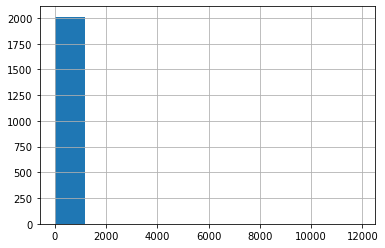

In [35]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count